<a href="https://colab.research.google.com/github/LeonimerMelo/Deep_Learning/blob/Artificial-Neural-Networks/Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activation functions
We've looked at two nonlinear activation functions already:

* the step function
* sigmoid

These functions are applied to the output weighted sum calculated by a layer before we pass the values onto the next layer or to output. They are the key element of Neural Networks. **Activation functions are what make Neural Networks so versatile and powerful**! Besides sigmoid and step functions there are other powerful options. Let's look at a few more.

Sigmoid and Step functions are easy to define using `numpy` (using their mathematical formulas):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def step(x):
  return x > 0

def linear(x):
  return x

They both map the real axis onto the interval between 0 and 1 ($[0, 1]$), i.e. they are bounded:

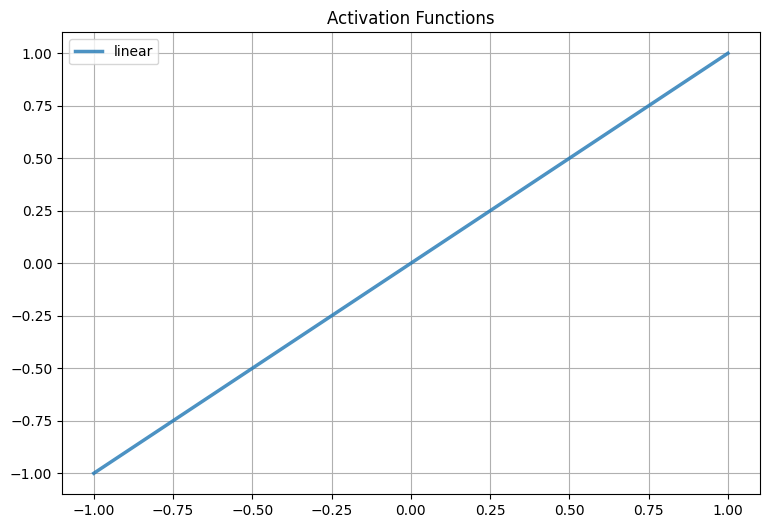

In [ ]:
x = np.linspace(-1, 1, 500)
plt.figure(figsize=(9, 6))
plt.plot(x, linear(x), linewidth=2.5, alpha=.8)
plt.grid()
plt.legend(['linear'])
plt.title('Activation Functions')
plt.show()

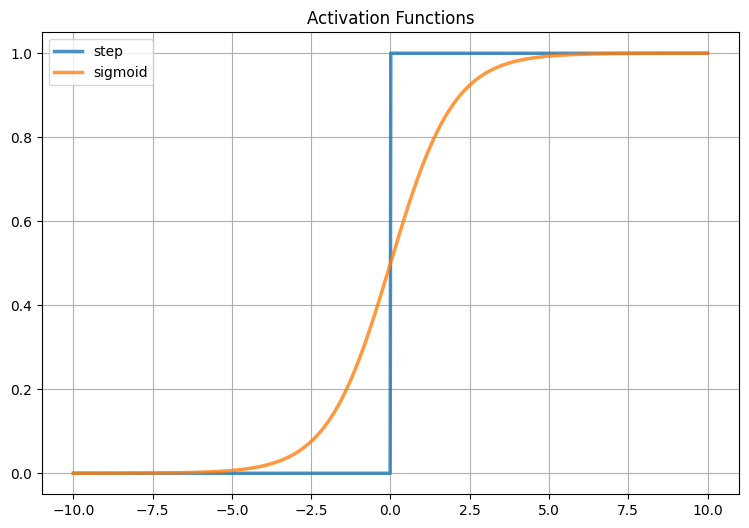

In [ ]:
plt.figure(figsize=(9, 6))
x = np.linspace(-10, 10, 1000)
plt.plot(x, step(x), linewidth=2.5, alpha=.8)
plt.plot(x, sigmoid(x), linewidth=2.5, alpha=.8)
plt.grid()
plt.legend(['step', 'sigmoid'])
plt.title('Activation Functions')
plt.show()

hey are designed to squeeze a large output sum to 1 while taking a really negative output that sums to 0.

It's as if each node was performing an independent classification of the input features and feeding the output binary outcome onto the next layer.

Besides the `sigmoid` and `step`, other nonlinear activation functions are possible and will be used in this book. Let's look at a few of them:

### Tanh
The [hyperbolic tangent](https://en.wikipedia.org/wiki/Hyperbolic_function) has a very similar shape to the sigmoid, but it is bounded and smoothly varying between $[-1, +1]$ instead of $[0, 1]$, and is defined as:

\begin{equation}
y = tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
\end{equation}

The advantage of this is that negative values of the weighted sum are not forgotten by setting them to zero, but are given a negative weight. In practice `tanh` makes the network learn much faster than `sigmoid` or `step`.

We can write the `tanh` function simply in Python as well, but we don't have to. An efficient version of the `tanh` function is available through numpy:

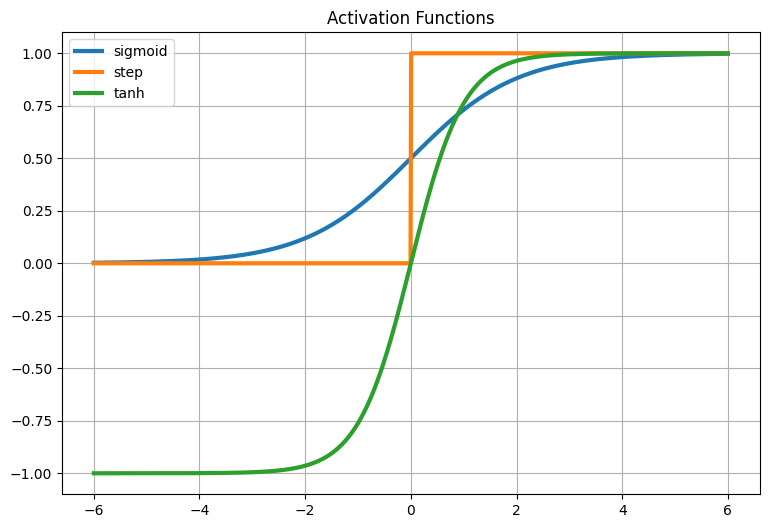

In [ ]:
x = np.linspace(-6, 6, 1000)
plt.figure(figsize=(9, 6))
plt.plot(x, sigmoid(x), linewidth=3)
plt.plot(x, step(x), linewidth=3)
plt.plot(x, np.tanh(x), linewidth=3)
plt.legend(['sigmoid', 'step', 'tanh'])
plt.title('Activation Functions')
plt.grid()
plt.show()

### ReLU
The [rectified linear unit](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29) function or simply *rectifier* is defined as:

\begin{equation}
y = \begin{cases}
x & {\text{if }} x > 0 \\
0 & {\text{otherwise}}
\end{cases}
\end{equation}

or simply:

\begin{equation}
y = \max(0, x)
\end{equation}

Initially motivated from biology, it has been shown to be very effective, and it is probably the most popular activation function for Deep Neural Networks. It offers two advantages.

1. If it's implemented as an `if statement` (the former of the two formulations above), it's calculation is very fast, much faster than smooth functions like `sigmoid` and `tanh`.
2. Not being bounded on the positive axis, it can distinguish between two large values of input sum, which helps back-propagation converge faster.

### Softplus
The [Softplus](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29) function is a smooth approximation of the `ReLU`:

\begin{equation}
y = \log(1 + e^x)
\end{equation}

We mention it for completeness, though it's rarely used in practice.

### SeLU
Finally, the SeLU activation function is a very recent development ([see paper published in June 2017](https://arxiv.org/abs/1706.02515)). The name stands for **scaled exponential linear unit** and it's implemented as:

\begin{equation}
y = \lambda \begin{cases}
x & {\text{if }} x > 0 \\
\alpha (e^x - 1) & {\text{otherwise}}
\end{cases}
\end{equation}

On the positive axis it behaves like the rectified linear unit (`ReLU`), scaled by a factor $\lambda$. On the negative axis it smoothly goes down to a negative value. This activation function, combined with a new regularization technique called **Alpha Dropout**, offers better convergence properties than `ReLU`!

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
np.log1p(np.exp(1)-1)

1.0

In [ ]:
def relu(x):
    cond = x > 0
    return cond * x

def softplus(x):
    return np.log1p(np.exp(x))

def selu(x):
    alpha = 1.67
    scale = 1.05
    res = scale * np.where(x>0.0, x, alpha * (np.exp(x) - 1))
    return res

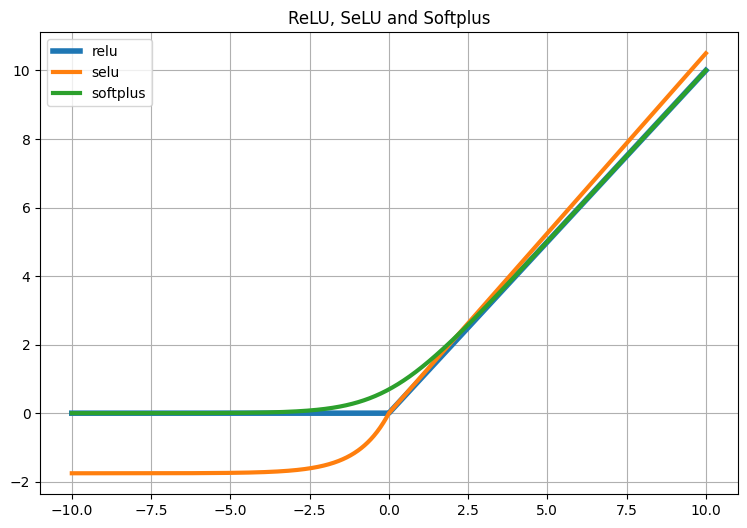

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(x, relu(x), linewidth=4)
plt.plot(x, selu(x), linewidth=3)
plt.plot(x, softplus(x), linewidth=3)
plt.legend(['relu', 'selu', 'softplus'])
plt.title('ReLU, SeLU and Softplus')
plt.grid()
plt.show()

When creating a deep network, we will use one of these activation functions _between_ one layer and the next, in order to make the Neural Network nonlinear. These functions are the secret power of Neural Networks: with nonlinearities at each layer they are able to approximate very complex functions.

##Referências
[1] https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

[2] https://www.geeksforgeeks.org/activation-functions-neural-networks/

[3] https://www.v7labs.com/blog/neural-networks-activation-functions

[4] https://encord.com/blog/activation-functions-neural-networks/